In [32]:
# Handling Wtong Values, Like MissingValues, in this case BP = 0 : replace(0,np.NaN)
# fillna for missing values
# StandardScaler

#  inplace = True
# KNeighborsClassifier

In [2]:
import pandas as pd
# CSV File - Read
df = pd.read_csv('C:\\Users\\radha\\Desktop\\dsp27 Class\\diabetes.csv')
#  ,header=None ,skiprows=1 , names=['Cal', 'Pr', 'Fat', 'sod', 'Fib', 'Rting']
print(df.head(5)) 
print(df.shape)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
(768, 9)


In [3]:
import numpy as np
diabetes_data_copy = df.copy(deep = True)
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [4]:
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace = True)
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace = True)
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace = True)
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(), inplace = True)

In [5]:
diabetes_data_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [27]:
# corr  - heatmap
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
#p=sns.heatmap(df['Outcome'].corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap
# NO GOOD CORRELATION  #cmap='viridis'
#df[df.columns[1:]].corr()
#F1 = df[df.columns[0:]].corr()
#F1['Outcome']
# OR
df.corr()['Outcome']


Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

<Figure size 864x720 with 0 Axes>

In [29]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_data_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [30]:
y = diabetes_data_copy.Outcome

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [33]:
#import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, algorithm="ball_tree")
knn.fit(X_train,y_train)
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,139,28,167
1,37,52,89
All,176,80,256


In [39]:
import sklearn.metrics as metrics
# NameError: name 'metrics' is not defined
print("Results with 3 Neighbors" )
print(metrics.classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes']) )

Results with 3 Neighbors
              precision    recall  f1-score   support

 No Diabetes       0.79      0.83      0.81       167
    Diabetes       0.65      0.58      0.62        89

    accuracy                           0.75       256
   macro avg       0.72      0.71      0.71       256
weighted avg       0.74      0.75      0.74       256



In [38]:
knn.score(X_train,y_train)

0.8671875

In [43]:
# To get BEST K from ELBOW Method
# https://datascienceplus.com/k-nearest-neighbors-knn-with-python/

In [42]:
error_rate = []
# Might take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

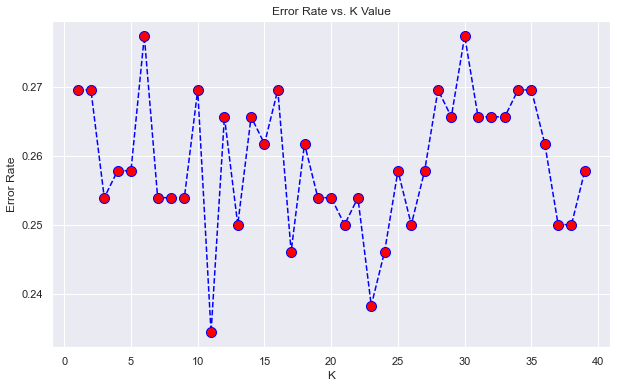

In [44]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [47]:
# best K =11

#import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=12, algorithm="ball_tree")
knn.fit(X_train,y_train)
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,145,22,167
1,46,43,89
All,191,65,256


In [48]:
import sklearn.metrics as metrics
# NameError: name 'metrics' is not defined
print("Results with 3 Neighbors" )
print(metrics.classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes']) )

Results with 3 Neighbors
              precision    recall  f1-score   support

 No Diabetes       0.76      0.87      0.81       167
    Diabetes       0.66      0.48      0.56        89

    accuracy                           0.73       256
   macro avg       0.71      0.68      0.68       256
weighted avg       0.73      0.73      0.72       256



In [49]:
# KNN  DISTANCE MTERICS - EUCLIDEAN, MANHATTAN, CHEBYSHEV
# https://www.kdnuggets.com/2020/11/most-popular-distance-metrics-knn.html

In [52]:


#import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

dmetrics = ['euclidean', 'manhattan','chebyshev']

for xmetric in dmetrics:
    knn = KNeighborsClassifier(n_neighbors=12, algorithm="ball_tree", metric=xmetric)
    knn.fit(X_train,y_train)
    #let us get the predictions using the classifier we had fit above
    y_pred = knn.predict(X_test)
    confusion_matrix(y_test,y_pred)
    print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True),"\n")

Predicted    0   1  All
True                   
0          145  22  167
1           46  43   89
All        191  65  256 

Predicted    0   1  All
True                   
0          149  18  167
1           47  42   89
All        196  60  256 

Predicted    0   1  All
True                   
0          148  19  167
1           48  41   89
All        196  60  256 



In [53]:
# algorithm="ball_tree"
#ball_tree’ will use BallTree

#‘kd_tree’ will use KDTree

#‘brute’ will use a brute-force search.

#‘auto’ will attempt to decide the most appropriate algorithm based on the values passed to fit method.

In [54]:
#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html